In [50]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
covid_df = pd.read_csv('covid_data.csv')

In [6]:
covid_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


In [10]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [11]:
covid_df['Date'] = pd.to_datetime(covid_df.Date)

In [11]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB


In [12]:
covid_df.describe()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,35156,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2020-04-24 12:00:00,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
min,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,2020-03-08 18:00:00,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2020-04-24 12:00:00,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,2020-06-10 06:00:00,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000
std,NaN,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852


In [13]:
covid_df['Month'] = pd.DatetimeIndex(covid_df.Date).month

In [14]:
covid_df.Month

0        1
1        1
2        1
3        1
4        1
        ..
35151    7
35152    7
35153    7
35154    7
35155    7
Name: Month, Length: 35156, dtype: int32

In [15]:
Monthly = covid_df.groupby('Month')[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']]

In [16]:
monthlySum = Monthly.sum()

In [17]:
monthlySum

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Month,,,,,,,
1,38534,889,838,36807,9372,196,191
2,1663437,46875,363669,1252893,75379,2723,38095
3,9002815,397601,2644372,5960842,786064,41542,135760
4,63391662,4311214,15944020,43136428,2412383,190226,815542
5,144990399,9609604,52876838,82503957,2921042,138902,1595973
6,246525787,13309053,116984268,116232466,4265801,137604,2695870
7,362895848,15709667,199594224,147591957,6030911,142826,4186628


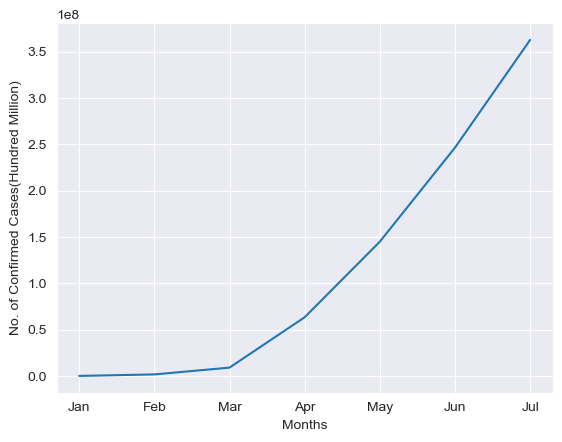

In [131]:
monthlySum['monthName'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']
plt.plot(monthlySum.monthName, monthlySum.Confirmed);
plt.xlabel('Months')
plt.ylabel('No. of Confirmed Cases(Hundred Million)');

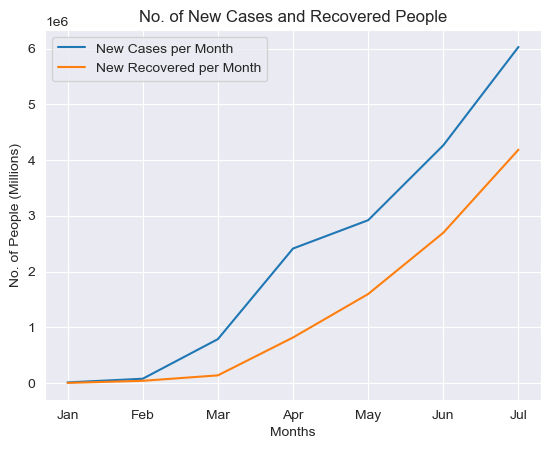

In [182]:
plt.plot(monthlySum.monthName, monthlySum['New cases']);
plt.plot(monthlySum.monthName, monthlySum['New recovered']);
plt.legend(['New Cases per Month', 'New Recovered per Month'])
plt.xlabel('Months')
plt.ylabel('No. of People (Millions)')
plt.title('No. of New Cases and Recovered People')
sns.set_style("darkgrid")

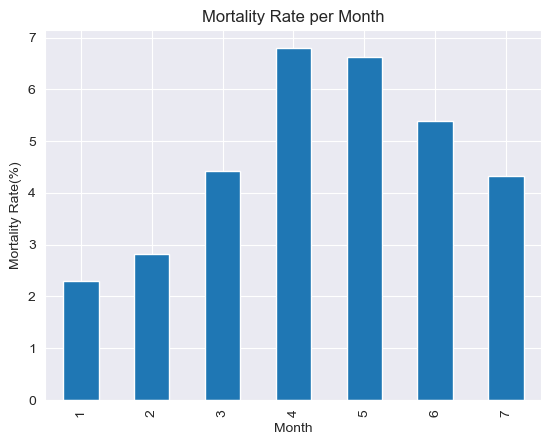

In [60]:
monthlySum['Mortality Rate(%)'] = (monthlySum.Deaths/monthlySum.Confirmed)*100
monthlySum['Mortality Rate(%)'].plot(kind='bar');
plt.ylabel('Mortality Rate(%)');
plt.title('Mortality Rate per Month');

In [62]:
monthlySum['Recovery Rate(%)'] = (monthlySum.Recovered/monthlySum.Confirmed)*100
monthlySum['Recovery Rate(%)']

Month
1     2.174703
2    21.862505
3    29.372724
4    25.151604
5    36.469200
6    47.453157
7    55.000415
Name: Recovery Rate(%), dtype: float64

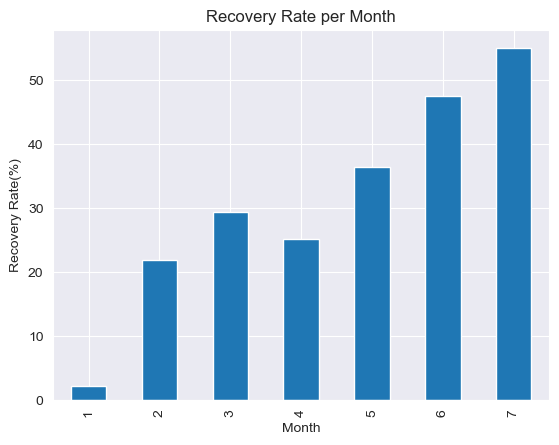

In [64]:
monthlySum['Recovery Rate(%)'].plot(kind='bar');
plt.ylabel('Recovery Rate(%)');
plt.title('Recovery Rate per Month');

In [123]:
group_country = covid_df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']]

In [133]:
sum_country = group_country.sum()
sum_country

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Afghanistan,1936390,49098,798240,1089052
Albania,196702,5708,118877,72117
Algeria,1179755,77972,755897,345886
Andorra,94404,5423,69074,19907
Angola,22662,1078,6573,15011
...,...,...,...,...
West Bank and Gaza,233461,1370,61124,170967
Western Sahara,901,63,648,190
Yemen,67180,17707,23779,25694


In [135]:
sum_country['No.'] = np.arange(1,188,1)

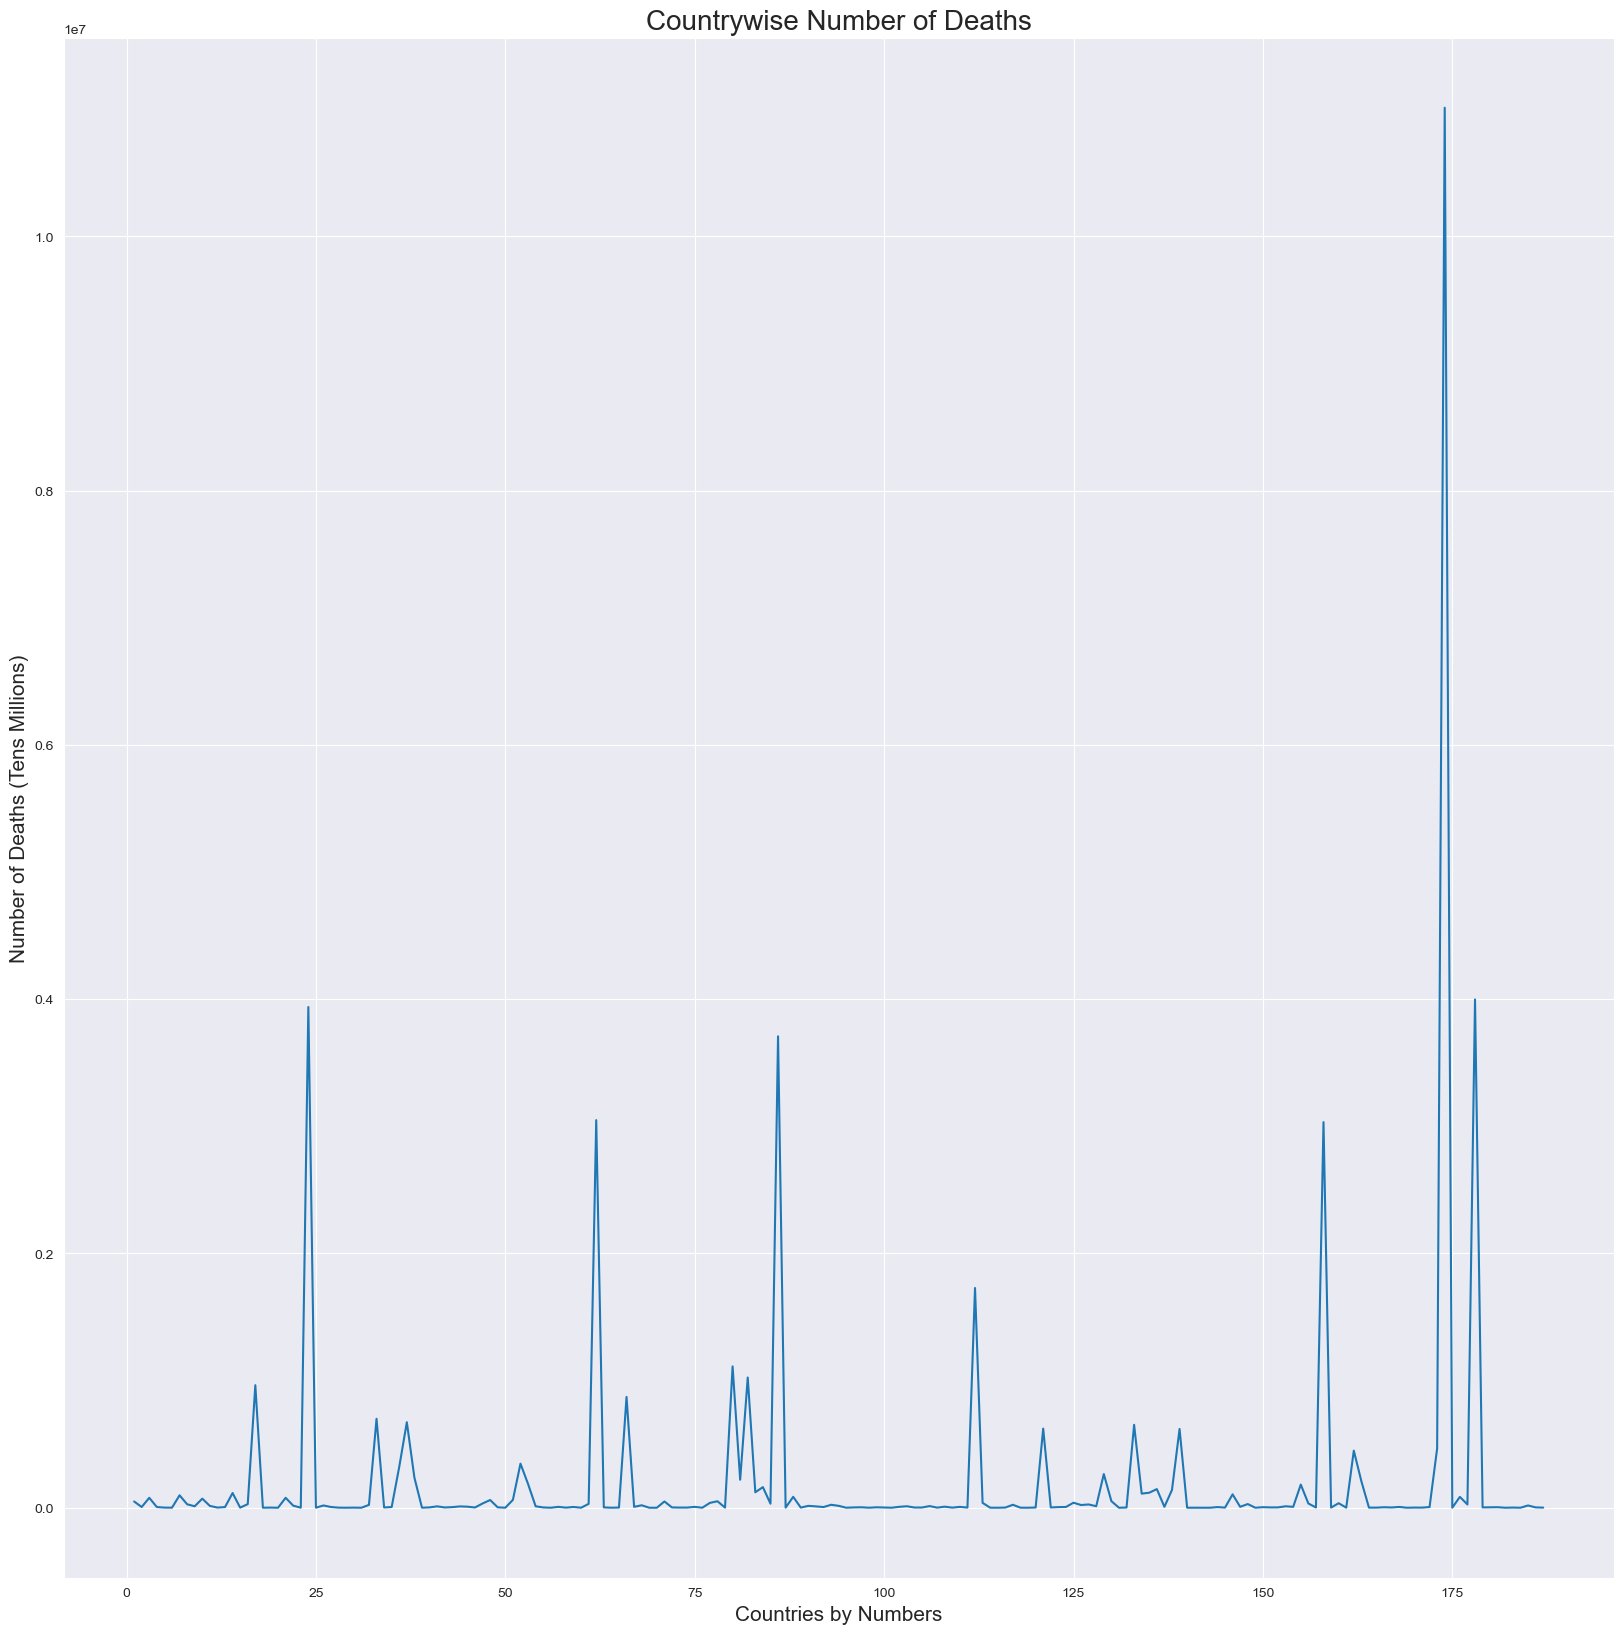

In [136]:
plt.figure(figsize=(20,20))
plt.plot(sum_country['No.'], sum_country.Deaths);
plt.xlabel('Countries by Numbers', fontsize=15);
plt.ylabel('Number of Deaths (Tens Millions)', fontsize=15);
plt.title('Countrywise Number of Deaths', fontsize=20);

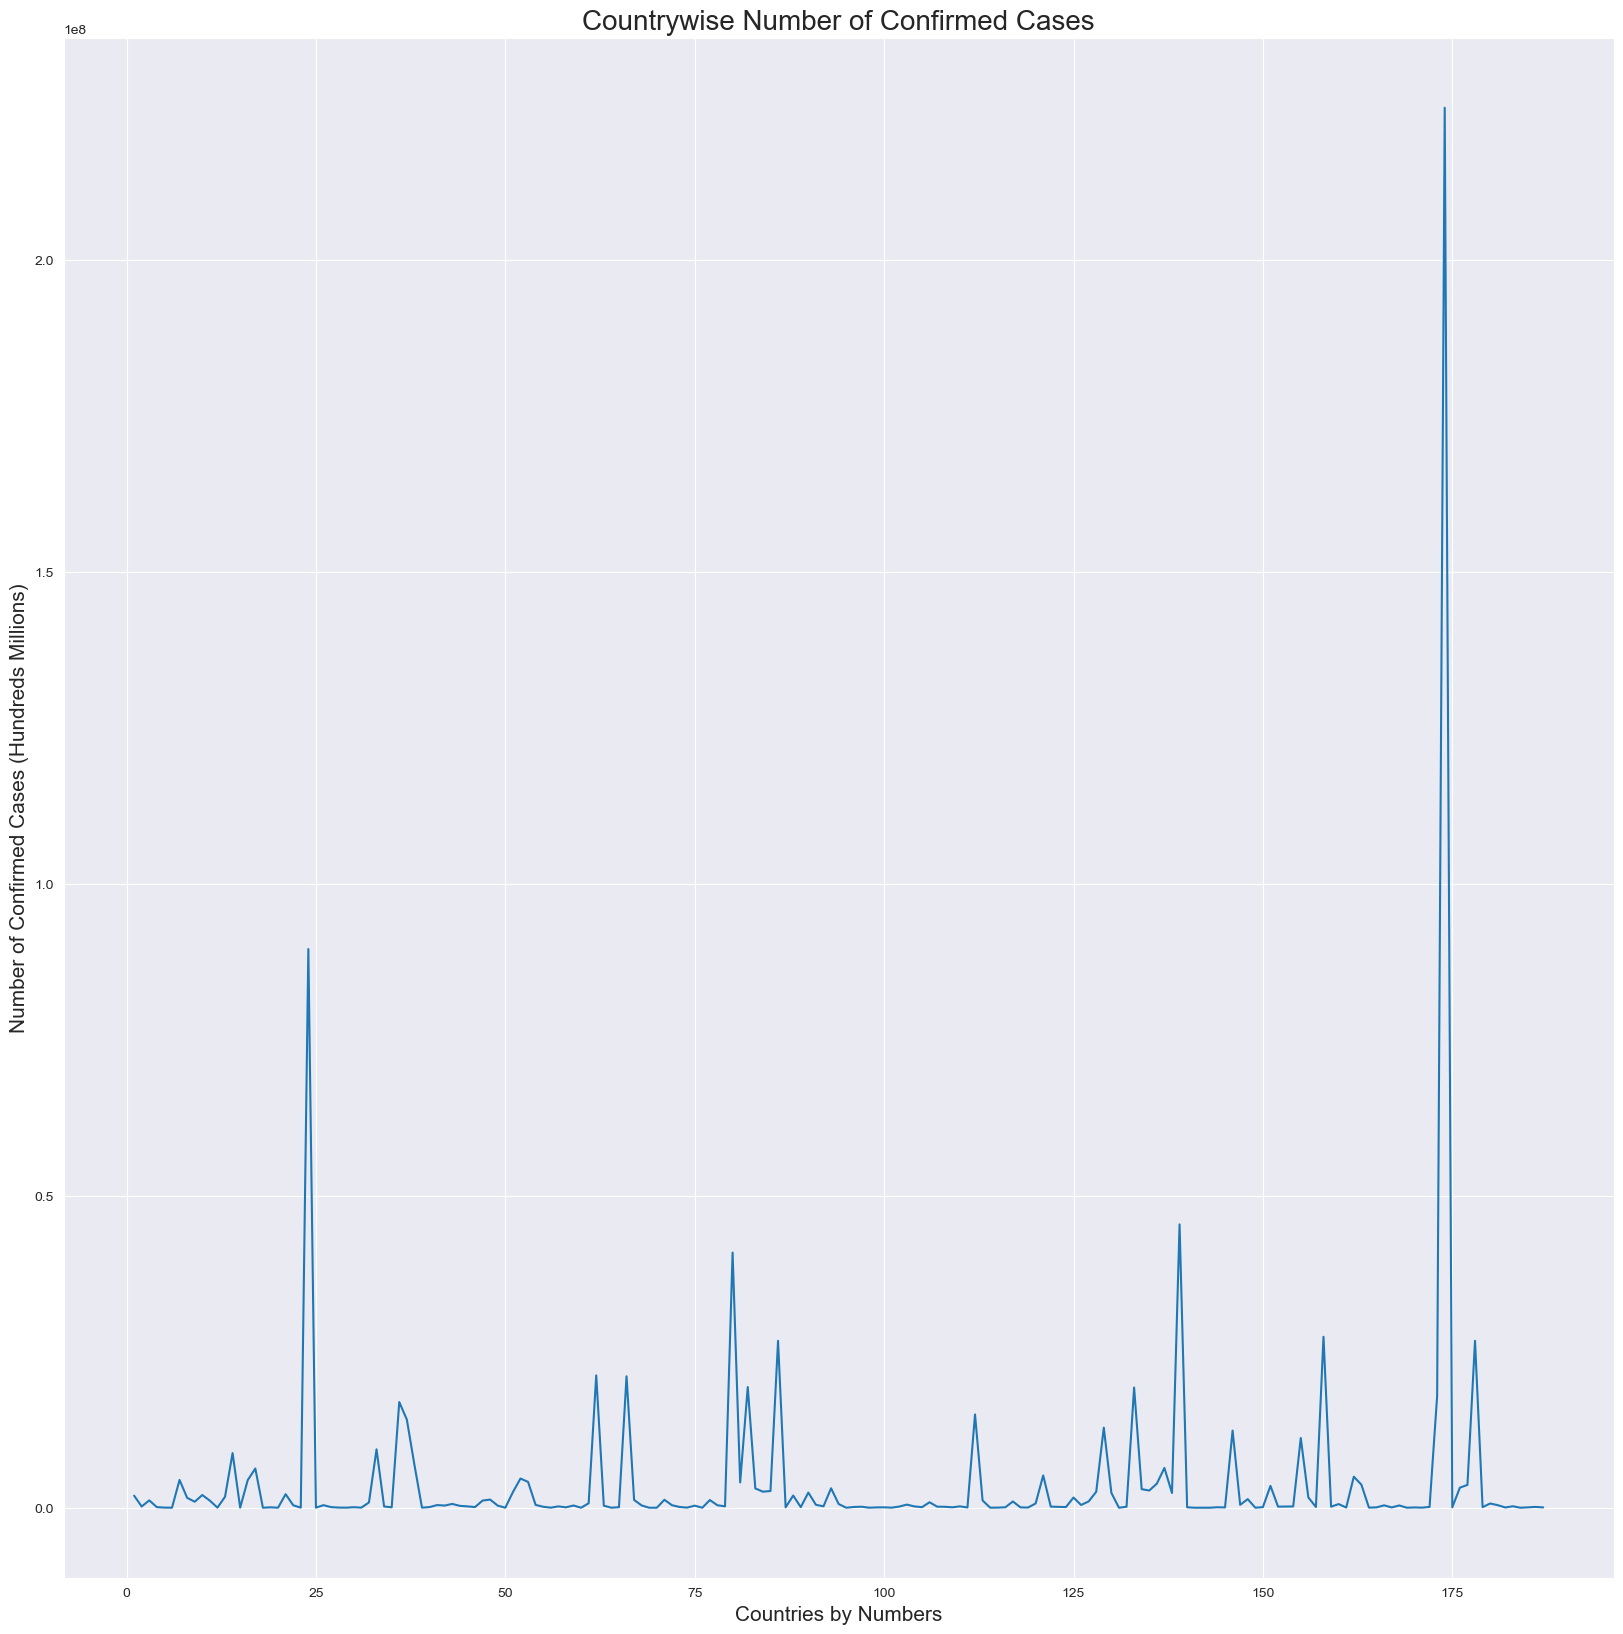

In [128]:
plt.figure(figsize=(20,20))
plt.plot(sum_country['No.'], sum_country.Confirmed);
plt.xlabel('Countries by Numbers', fontsize=15);
plt.ylabel('Number of Confirmed Cases (Hundreds Millions)', fontsize=15);
plt.title('Countrywise Number of Confirmed Cases', fontsize=20);

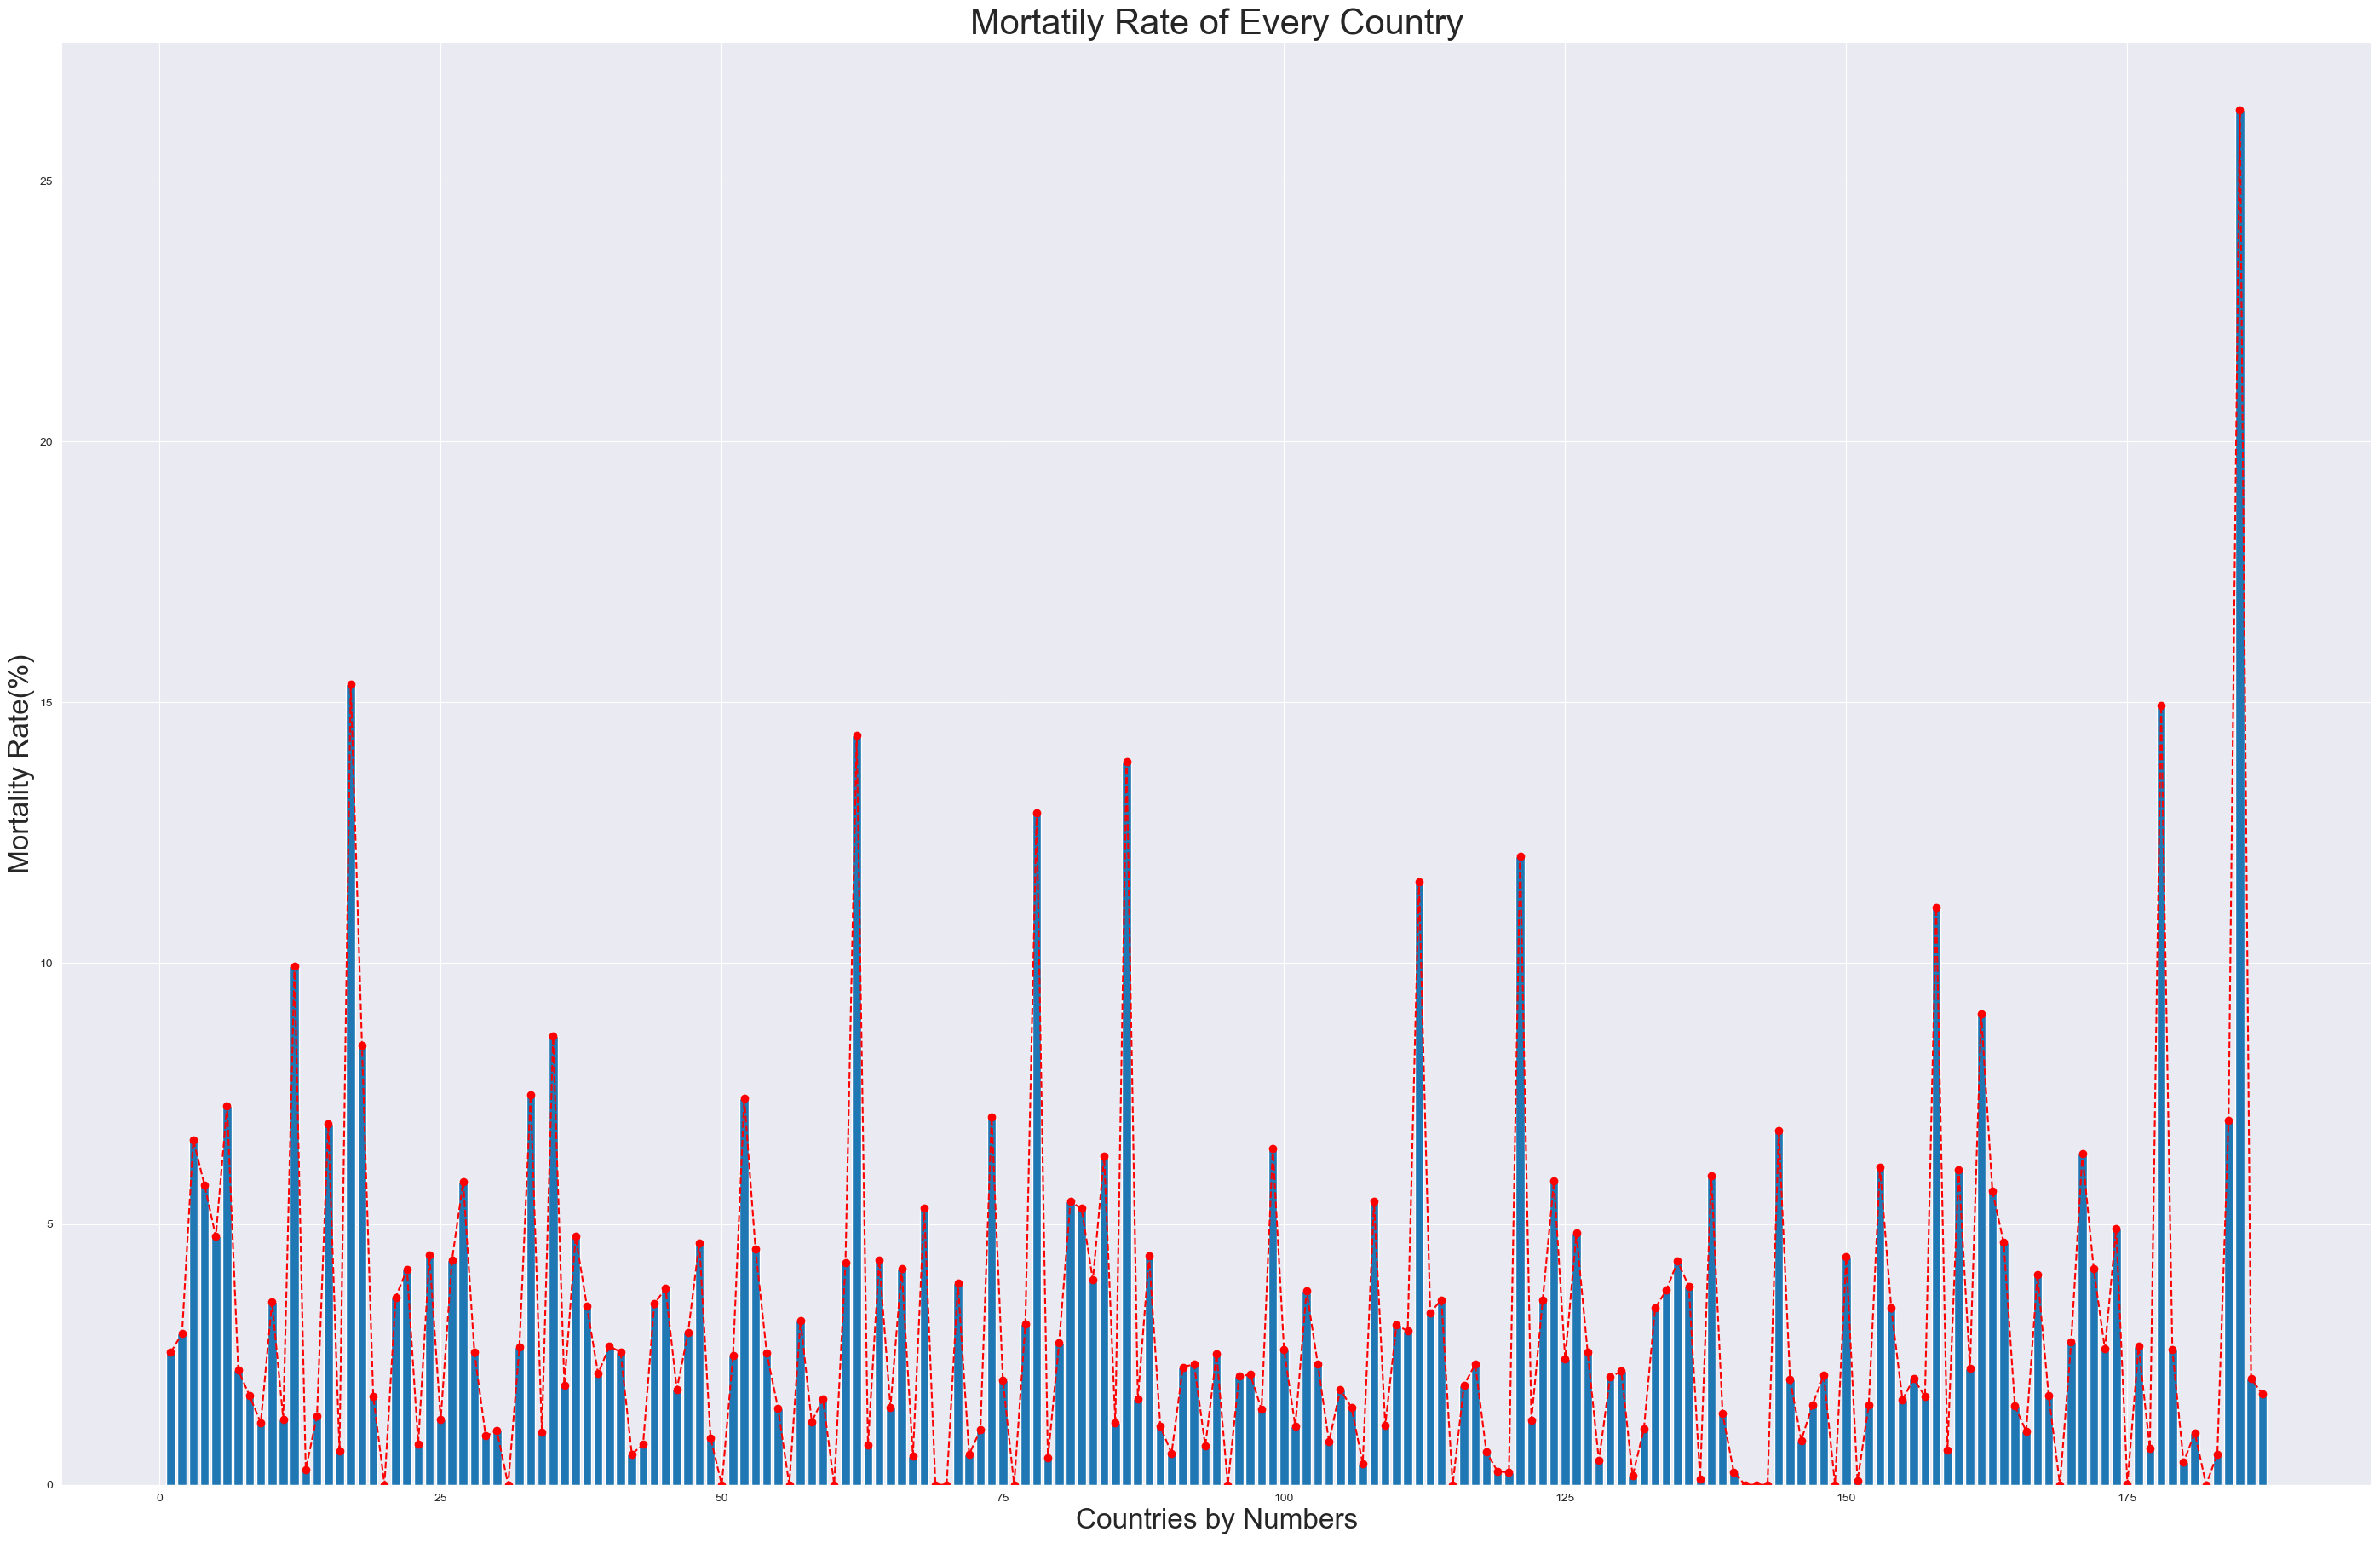

In [137]:
plt.figure(figsize=(35,22))
sum_country['Mortality Rate(%)'] = (sum_country.Deaths/sum_country.Confirmed)*100
plt.bar(sum_country['No.'], sum_country['Mortality Rate(%)']);
plt.plot(sum_country['No.'], sum_country['Mortality Rate(%)'], 'o--r');
plt.ylabel('Mortality Rate(%)', fontsize=24);
plt.xlabel('Countries by Numbers', fontsize=24);
plt.title('Mortatily Rate of Every Country', fontsize=30);

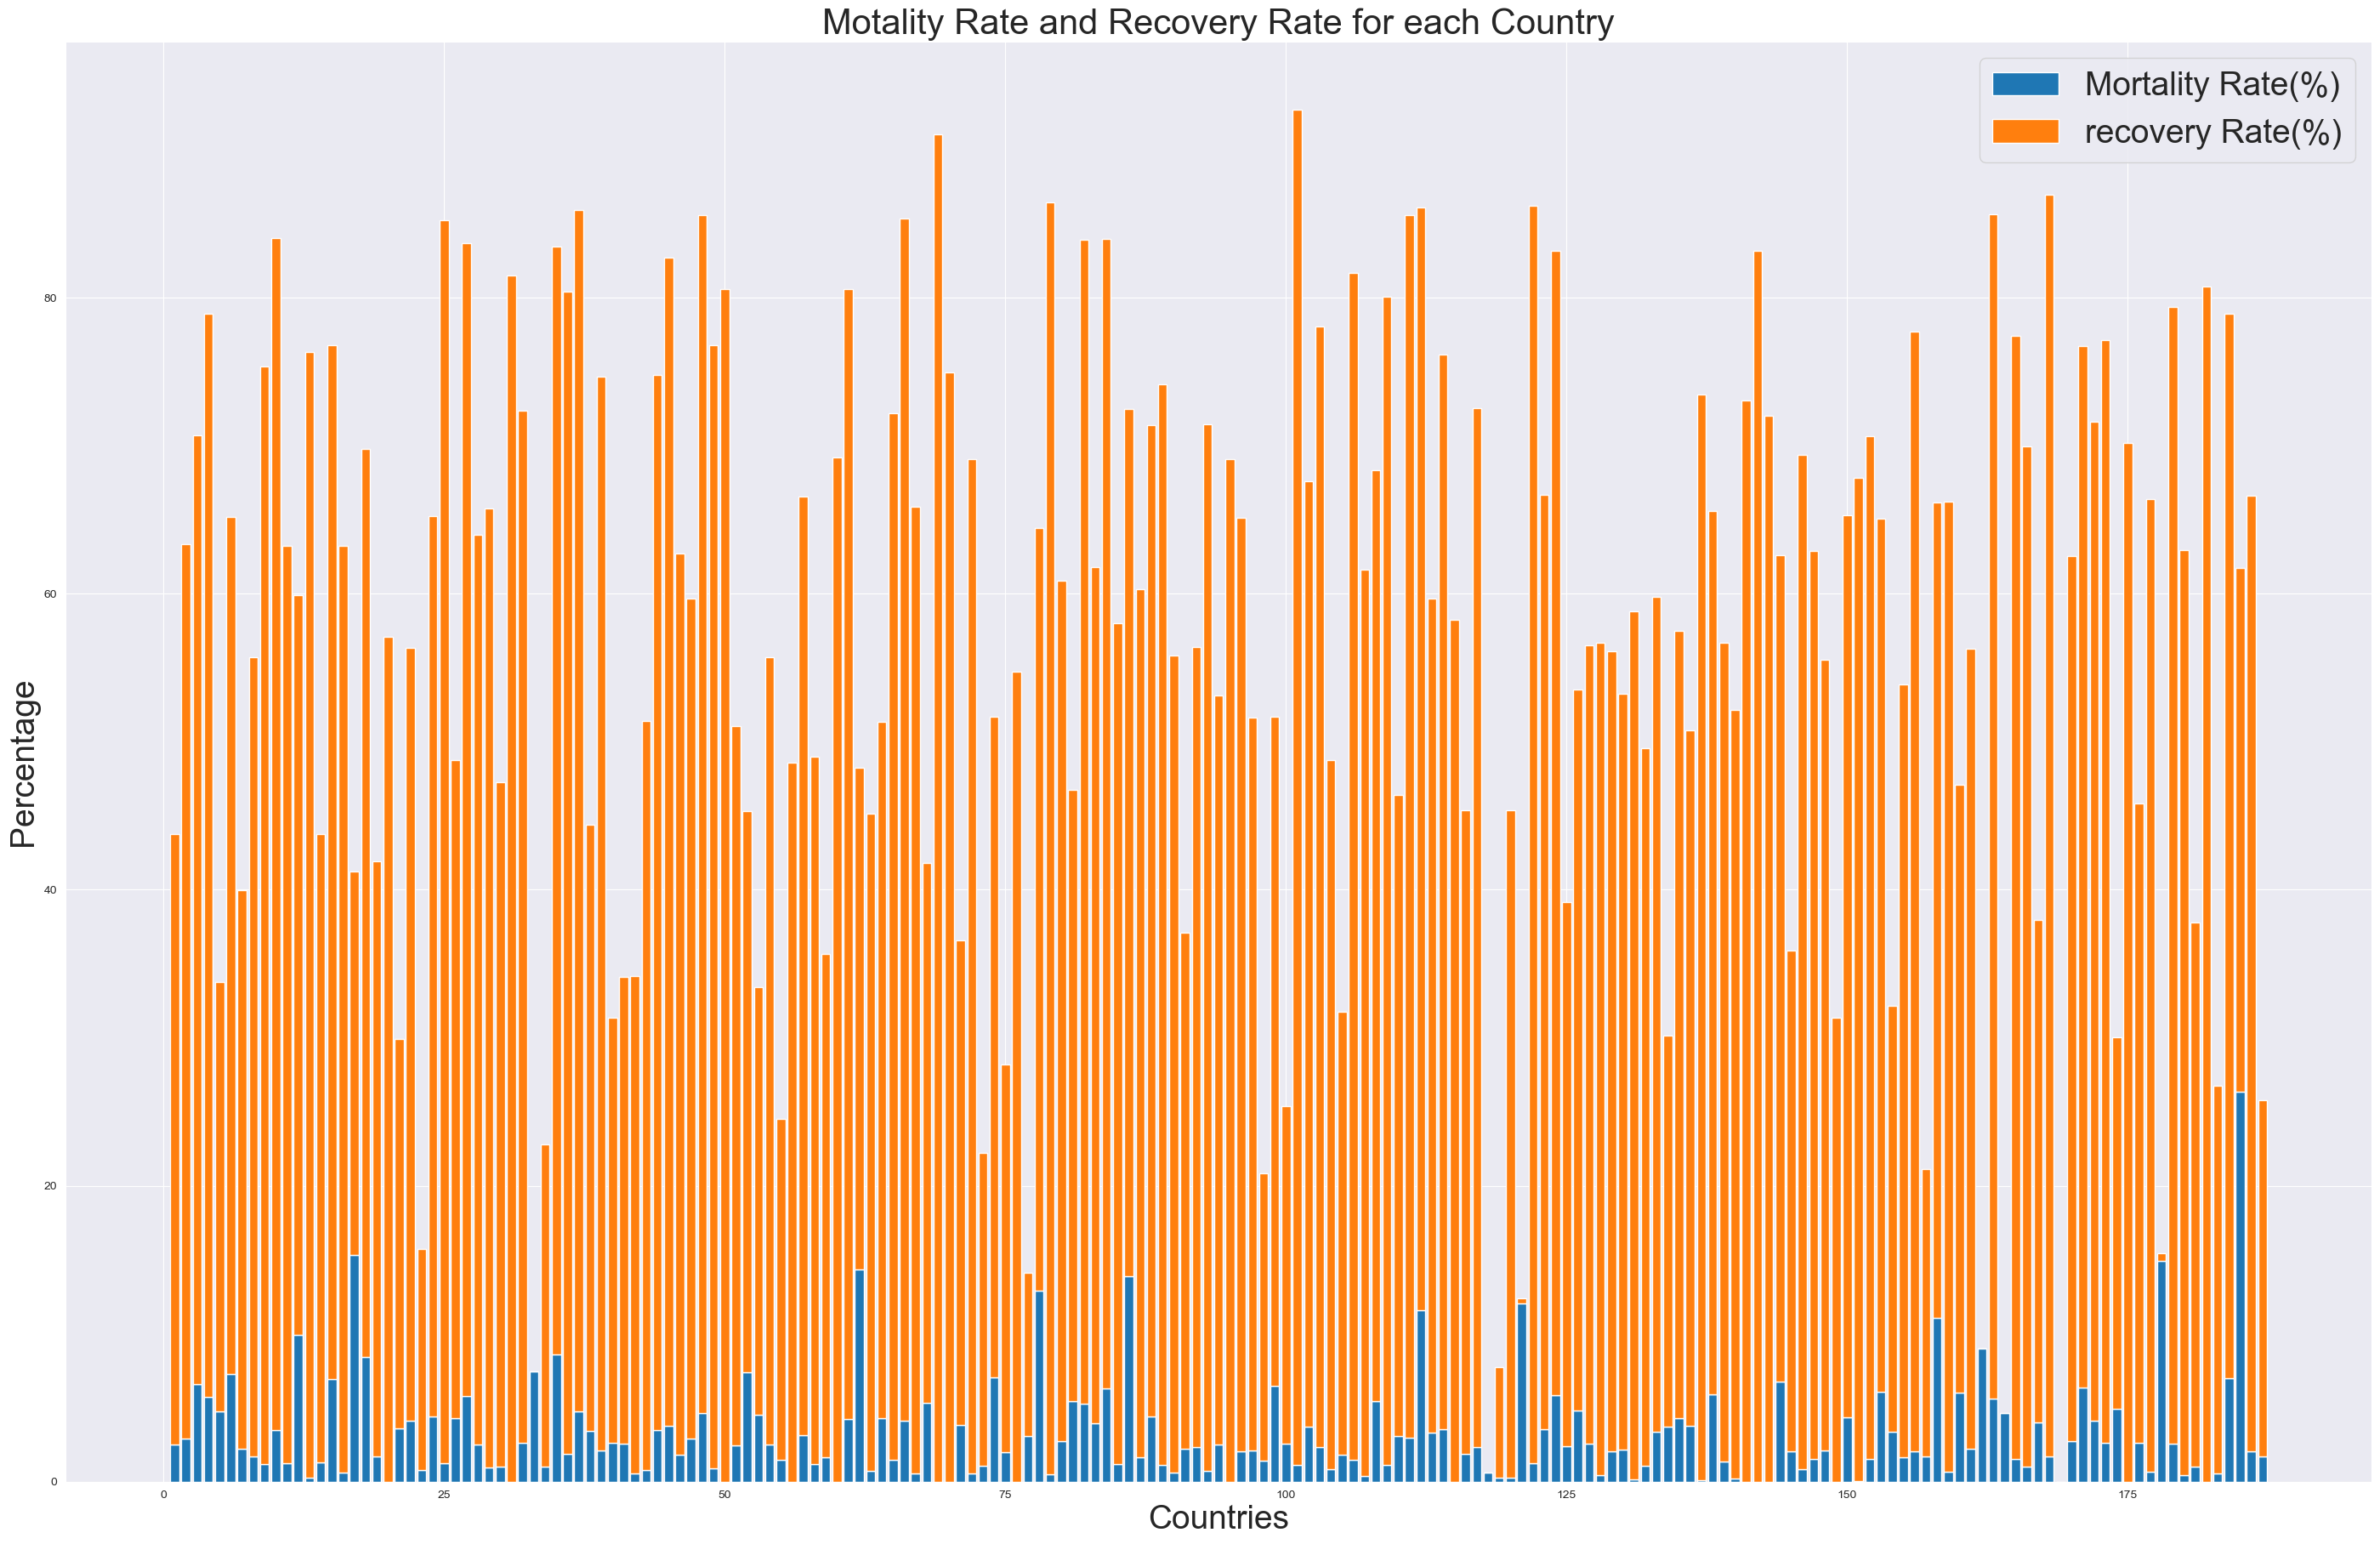

In [138]:
plt.figure(figsize=(35,22));
plt.bar(sum_country['No.'], sum_country['Mortality Rate(%)']);
sum_country['Recovery Rate(%)'] = (sum_country.Recovered/sum_country.Confirmed)*100
plt.bar(sum_country['No.'], sum_country['Recovery Rate(%)'], bottom=sum_country['Mortality Rate(%)'])
plt.legend(['Mortality Rate(%)','recovery Rate(%)'], fontsize=28);
plt.title('Motality Rate and Recovery Rate for each Country', fontsize=30)
plt.xlabel('Countries', fontsize=28)
plt.ylabel('Percentage', fontsize=28);

In [160]:
deaths_dayWise = covid_df.pivot(index='Date', columns='Country/Region', values='New deaths')
cases_dayWise = covid_df.pivot(index='Date', columns='Country/Region', values='New cases')
recovery_dayWise = covid_df.pivot(index='Date', columns='Country/Region', values='New recovered')


deaths_dayWise

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-23,21,3,13,0,0,0,114,10,6,0,...,53,0,5,5,0,1,0,3,6,2
2020-07-24,14,5,12,0,2,0,105,4,6,0,...,123,0,3,5,0,3,0,8,2,4
2020-07-25,23,6,10,0,4,0,86,8,10,1,...,61,0,5,4,0,5,0,5,3,2


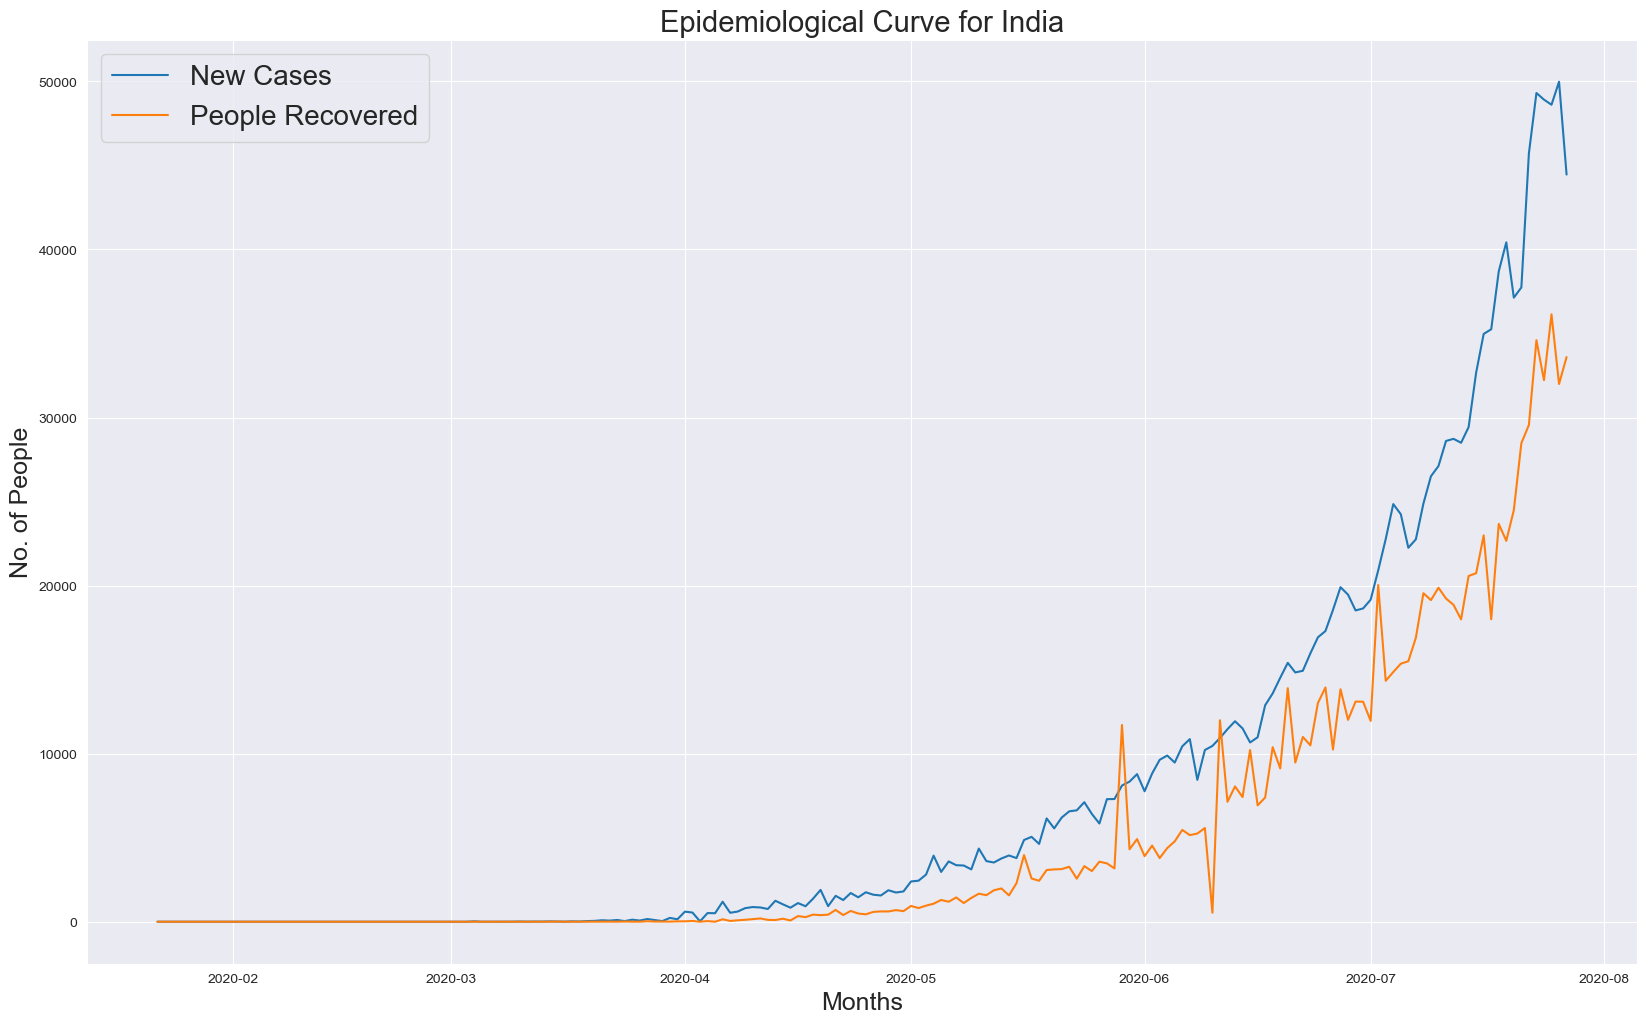

In [169]:
plt.figure(figsize=(20,12))
plt.plot(cases_dayWise.India);
plt.plot(recovery_dayWise.India);
plt.xlabel('Months', fontsize=18)
plt.ylabel('No. of People', fontsize=18)
plt.legend(['New Cases', 'People Recovered'], fontsize=20);
plt.title('Epidemiological Curve for India', fontsize=21);

The Epidemiological Curve for India shows the rise of Covid-19 cases starting out in March and climb till July and possibly further. This aligns with the duration of the First Wave as reported by National Institutes of Health (NIH), spanning from March 2020 to November 2020. The cases were controlled due to containment measures and lockdown throughout the country. 

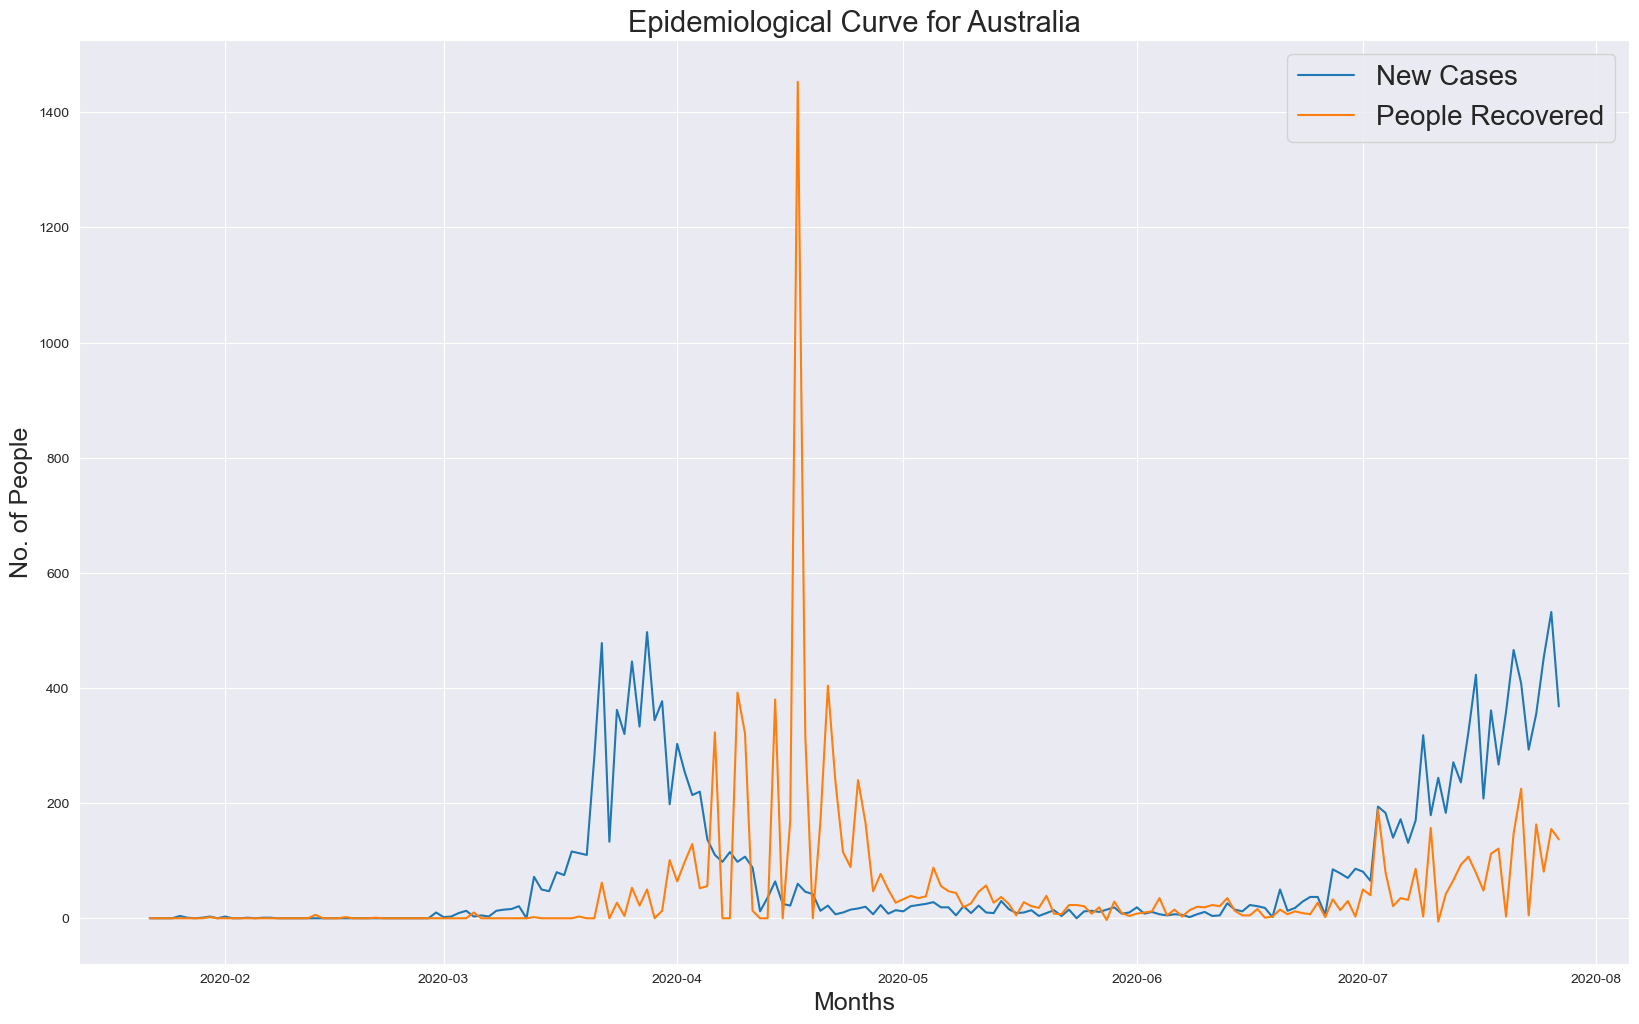

In [171]:
plt.figure(figsize=(20,12))
plt.plot(cases_dayWise.Australia);
plt.plot(recovery_dayWise.Australia);
plt.xlabel('Months', fontsize=18)
plt.ylabel('No. of People', fontsize=18)
plt.legend(['New Cases', 'People Recovered'], fontsize=20);
plt.title('Epidemiological Curve for Australia', fontsize=21);

The above Epidemiological Curve for Australia shows the influx of cases starting from the first week of March and hitting a peak around end of March. For the subsequent months there were very few cases till the end of June. This was the result of swift actions of the Government like inward travel restrictions for Foreign Nationals, implementation of compulsory 14-day self-isolation for all international arrivals and a Nationwide Lockdown starting from 22 March 2020 after which the number of cases started declining. The sudden influx in cases at the end of June 2020 is conducive to the outbreak at Victoria, the state was once again under lockdown owing to the above fact.     

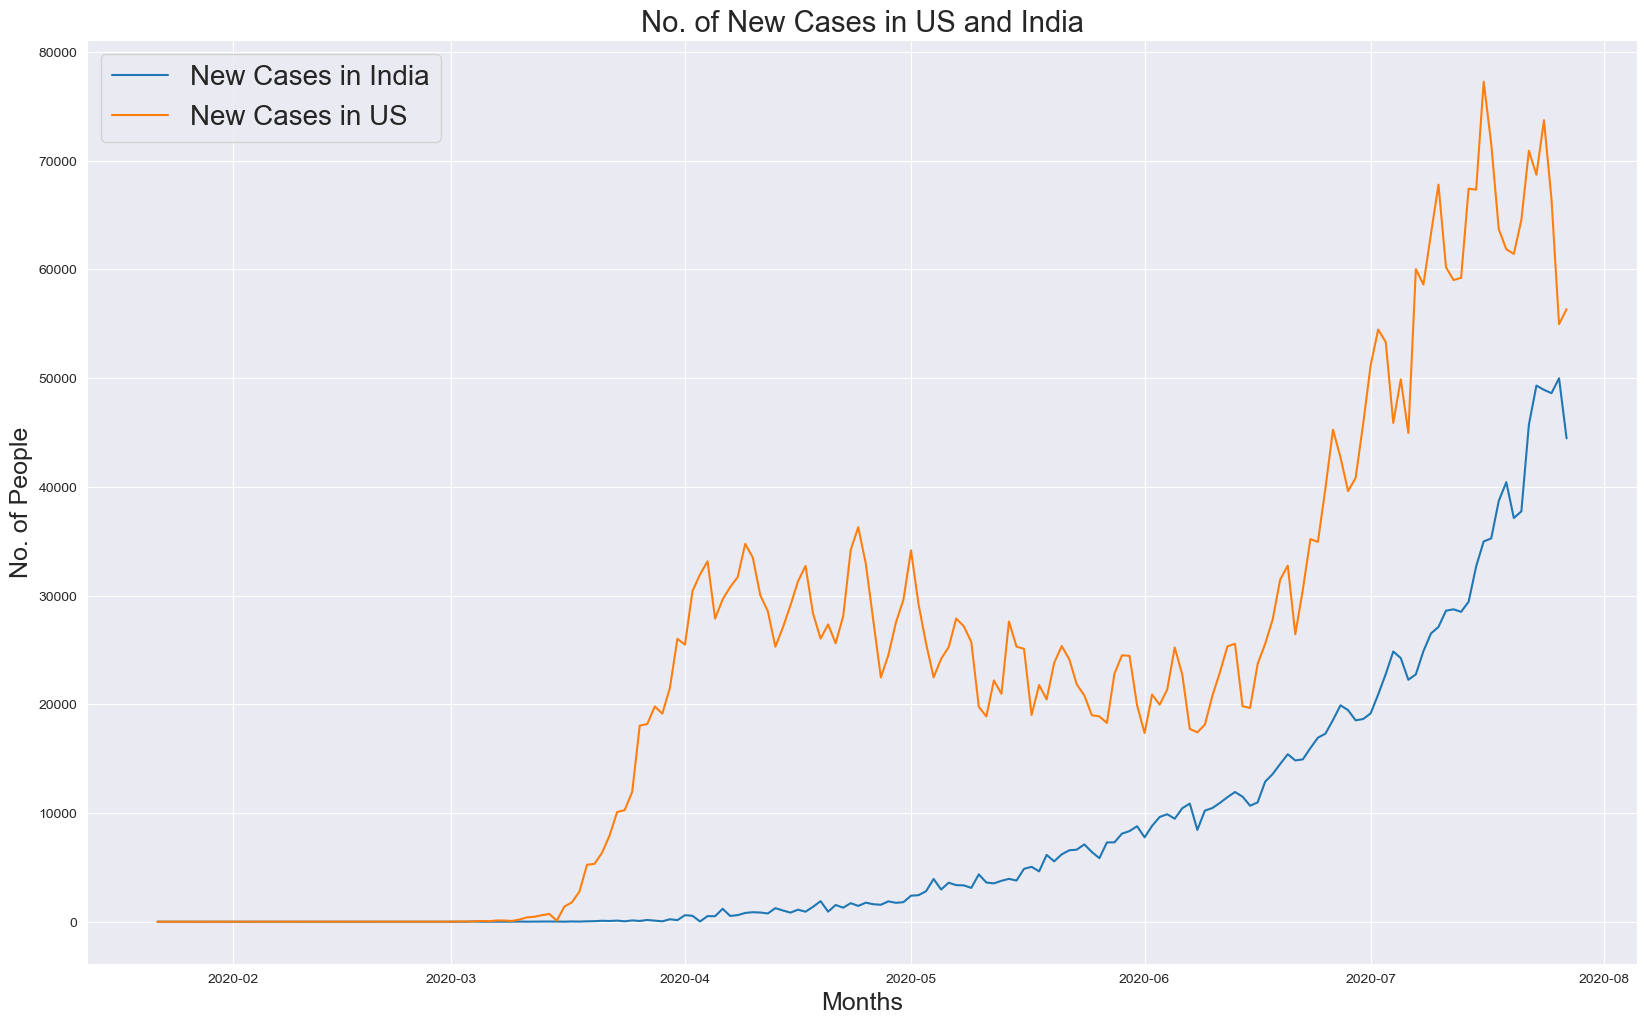

In [175]:
plt.figure(figsize=(20,12))
plt.plot(cases_dayWise.India);
plt.plot(cases_dayWise.US);
plt.xlabel('Months', fontsize=18)
plt.ylabel('No. of People', fontsize=18)
plt.legend(['New Cases in India', 'New Cases in US'], fontsize=20);
plt.title('No. of New Cases in US and India', fontsize=21);

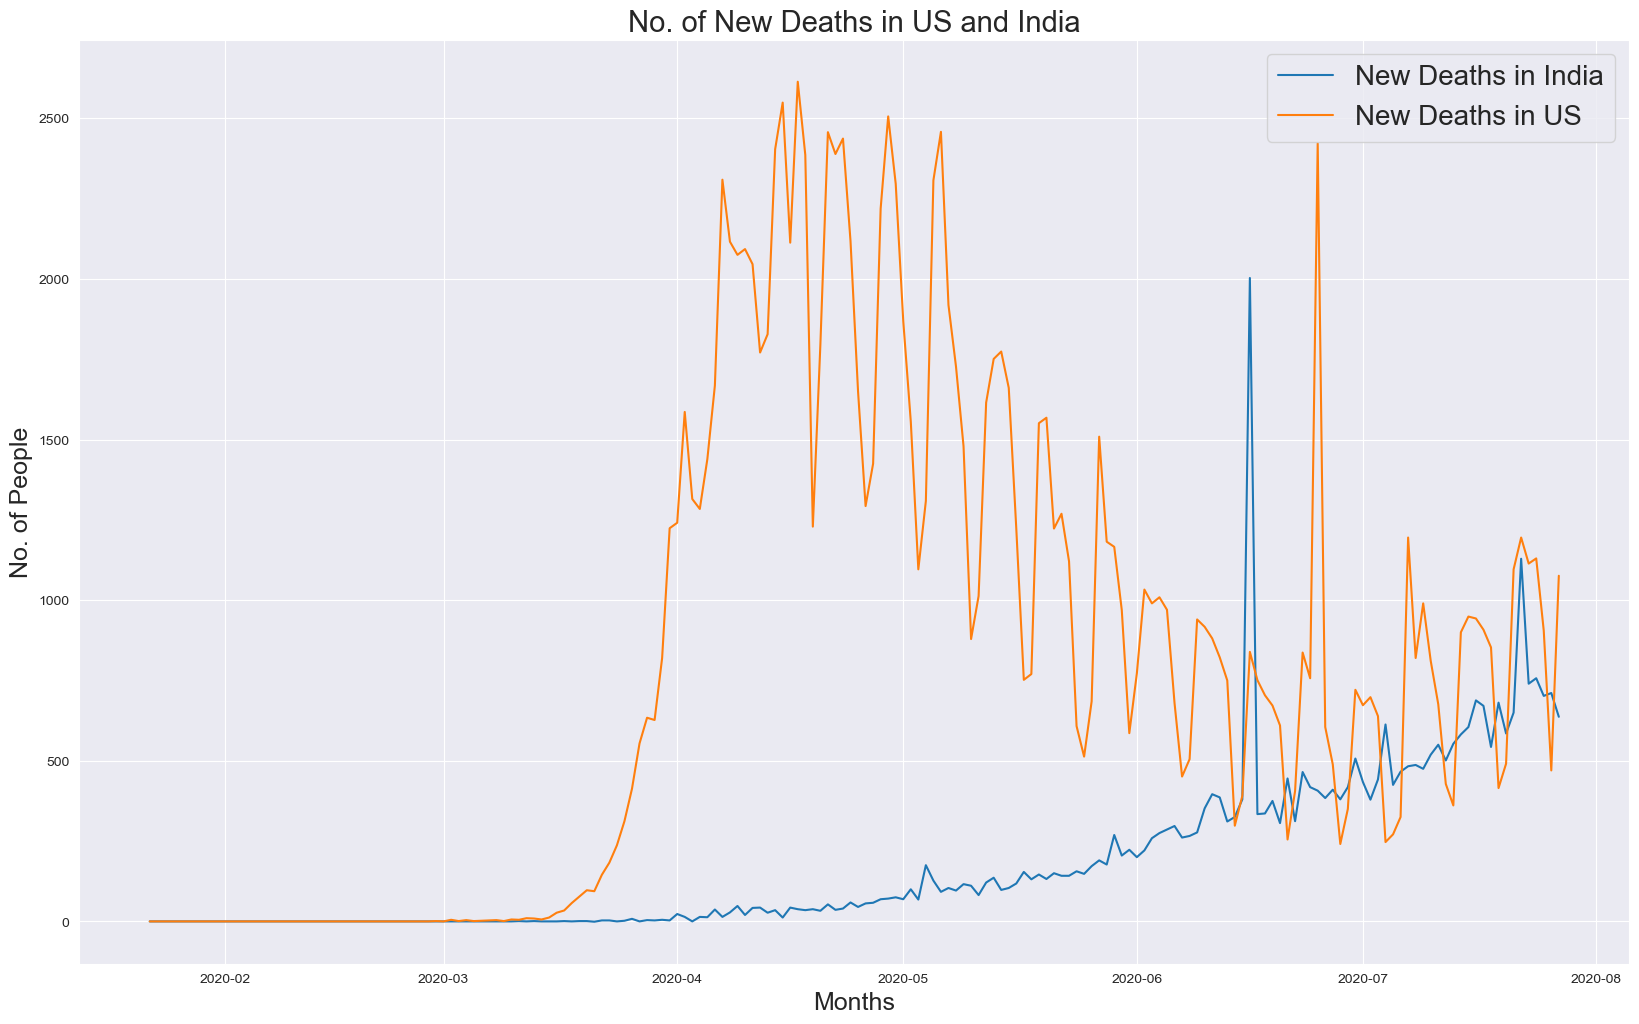

In [176]:
plt.figure(figsize=(20,12))
plt.plot(deaths_dayWise.India);
plt.plot(deaths_dayWise.US);
plt.xlabel('Months', fontsize=18)
plt.ylabel('No. of People', fontsize=18)
plt.legend(['New Deaths in India', 'New Deaths in US'], fontsize=20);
plt.title('No. of New Deaths in US and India', fontsize=21);

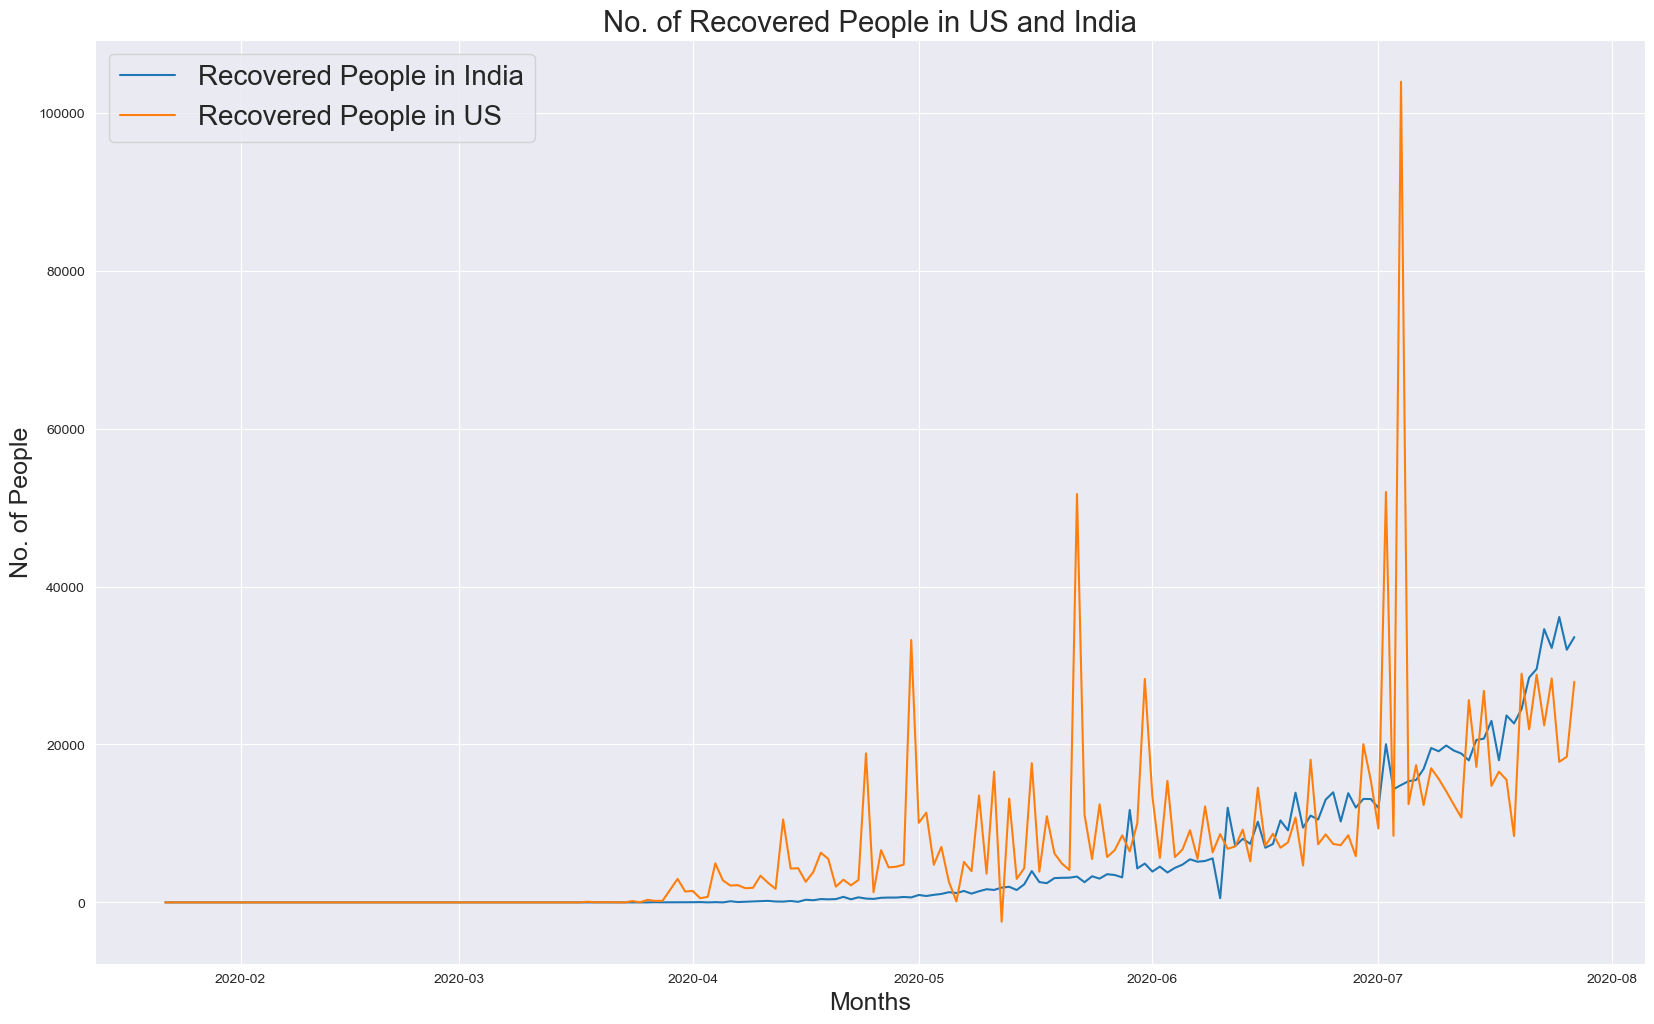

In [177]:
plt.figure(figsize=(20,12))
plt.plot(recovery_dayWise.India);
plt.plot(recovery_dayWise.US);
plt.xlabel('Months', fontsize=18)
plt.ylabel('No. of People', fontsize=18)
plt.legend(['Recovered People in India', 'Recovered People in US'], fontsize=20);
plt.title('No. of Recovered People in US and India', fontsize=21);

From the above graphs it seems that India had fewer COVID-19 cases than the United States, this could be due to differences in testing approaches, population density, and healthcare systems. India initially focused on targeted testing and contact tracing. Challenges in accessing testing and reporting delays may have also led to an underestimation of cases, especially in rural areas with limited healthcare resources. In contrast, the United States had a higher number of confirmed cases. This could be due to factors like population density and greater testing capacity. Challenges like testing availability and result reporting delays may have also contributed to the higher case count.

The regional disparities are quiet evident between both the countries, which can be attributed to various factors like Healthcare Infrastructure, Government response and Socio-Economic factors.  

# Conclusion

1. The dataset provides a worldwide overview of COVID-19's spread by gathering data from 187 countries.  

2. This extensive data collection shows how widely the pandemic has affected nations across various continents and regions.  

3. The diverse representation of countries offers crucial insights into the global scale of the COVID-19 pandemic.  

4. It emphasizes COVID-19's status as a global crisis, affecting populations regardless of geographic location or socio-economic background.  

5. Data from countries with diverse continents, population sizes, and economic levels allow for a comprehensive understanding of the pandemic's impact on a global scale which enables researchers and policymakers to analyze the pandemic's impact across a broad spectrum of contexts.